# Softmax regression numpy implementation

## import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## load data

6
[[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]


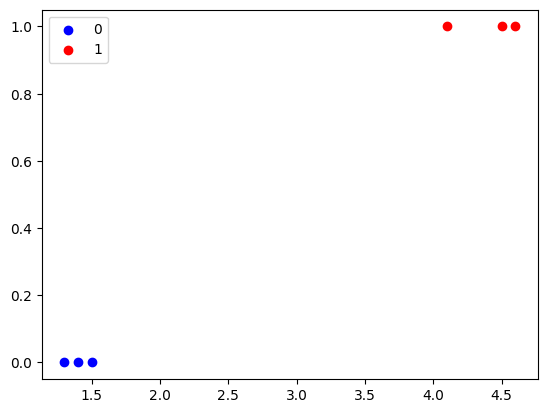

In [2]:
df = pd.read_csv('iris_1D_2c.csv')
X = df.iloc[:, 0:1].values
print(np.shape(X)[0])
y = df.iloc[:, 1].values
y = y.astype(np.uint8)
print(X)
plt.Figure(figsize=(8,4))
plt.scatter(X[y == 0][:, 0], y[y==0], color= 'b', label= '0')
plt.scatter(X[y == 1][:, 0], y[y==1], color= 'r', label= '1')
plt.legend()
plt.show()

## Train

In [3]:
N = len(X)
k = 2

def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print(y_one_hot)

# create arr shape of X (axis = 0) = 1
tempX = np.ones((np.shape(X)[0], 1))
X = np.hstack((tempX, X))
print(X)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


## initialization parameter

In [4]:
lr = 0.1
losses = []
epoch_max = 100

theta = np.array([
    [0.1, 0.05],
    [0.2, -0.1]
])
for epoch in range(epoch_max):
    for i in range(N):
        #compute z
        xi = X[i]
        yi = y_one_hot[i]
        xi = xi.reshape((-1,1))
        yi = yi.reshape((-1, 1))

        z = theta.T.dot(xi)
        # compute y_hat
        y_hat = (np.exp(z)) / (np.sum(np.exp(z), axis= 0))

        #compute loss
        loss = -yi.T.dot(np.log(y_hat))
        losses.append(loss[0])

        #compute gradient
        dtheta = xi.dot((y_hat - yi).T)
        #update weight
        theta -= lr*dtheta


## Visualization


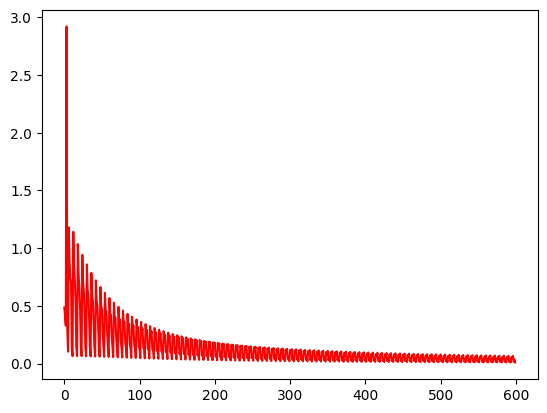

In [5]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color = 'r')

In [6]:
score = []

for i in range(N):
    xi = X[i]
    yi = y_one_hot[i]
    z = theta.T.dot(xi)
    score.append(z)

predicted_class = np.argmax(score, axis=1)
predicted_class


array([0, 0, 0, 1, 1, 1])